In [1]:
# Import necessary libraries
import os
import librosa
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split

2023-12-19 22:31:05.509633: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-19 22:31:05.538035: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-19 22:31:05.538064: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-19 22:31:05.538869: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-19 22:31:05.543544: I tensorflow/core/platform/cpu_feature_guar

In [2]:
def preprocess_mfcc(audio_file_path, n_mfcc=18, fixed_length=200):
    # Load the audio file
    y, sr = librosa.load(audio_file_path)
    
    # Compute MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    
    # Pad or truncate MFCCs to the fixed length
    if mfccs.shape[1] < fixed_length:
        mfccs_padded = np.pad(mfccs, ((0, 0), (0, fixed_length - mfccs.shape[1])), mode='constant')
    elif mfccs.shape[1] > fixed_length:
        mfccs_padded = mfccs[:, :fixed_length]
    else:
        mfccs_padded = mfccs
    
    return mfccs_padded

In [3]:
# Load the CSV file containing filenames and labels
dataset_directory = './dataset/'
csv_file_path = 'audio_filenames.csv'
df = pd.read_csv(csv_file_path)

# Load MFCC data for each audio file and preprocess it
mfcc_data = []
for filename in df['Filename']:
    # Load and preprocess MFCC data for the audio file (replace with your preprocessing code)
    mfcc = preprocess_mfcc(dataset_directory+filename)
    mfcc_data.append(mfcc)

# Create NumPy arrays for MFCC data and labels
X = np.array(mfcc_data)
y = df['Label'].values

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True)
# You can print the shapes to verify the split
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

X_train shape: (317, 18, 200)
X_val shape: (80, 18, 200)
y_train shape: (317,)
y_val shape: (80,)


2023-12-19 22:31:11.612710: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 17989 MB memory:  -> device: 0, name: NVIDIA RTX A5000, pci bus id: 0000:65:00.0, compute capability: 8.6
2023-12-19 22:31:12.002286: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2023-12-19 22:31:12.067003: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


3/3 [==============================] - 0s 41ms/step


2023-12-19 22:31:12.203349: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


AUC: 0.8907563025210083


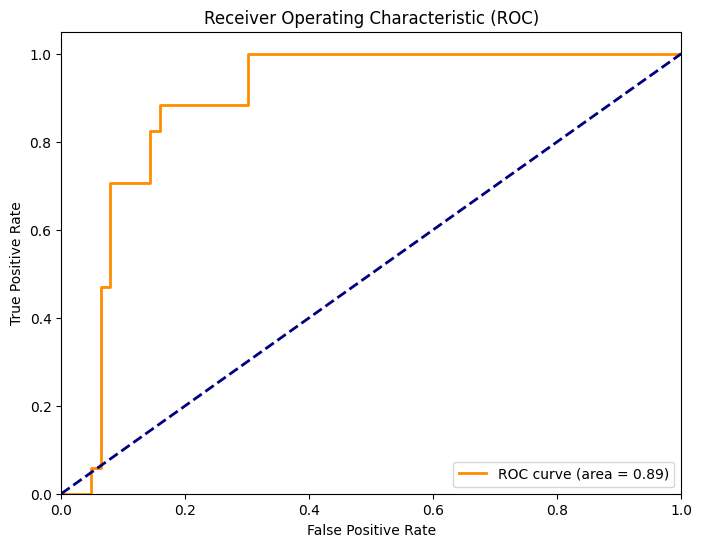

In [4]:

# Calculate ROC curve
model = load_model('./model/WATERMELON_CNN-7.hdf5')
y_pred = model.predict(X_val)
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve with AUC value displayed
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')

# Print the AUC value
print('AUC:', roc_auc)

plt.show()
